### 讀取大盤資料

In [1]:
from finlab.data import Data

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = Data()

twii = data.get("發行量加權股價指數")

twii = twii['台股指數']

twii.head()

date
2006-01-02 09:00:00    6548.34
2006-01-02 09:01:00    6457.61
2006-01-02 09:02:00    6452.82
2006-01-02 09:03:00    6452.39
2006-01-02 09:04:00    6451.61
Name: 台股指數, dtype: float64

### 整理加權指數 1分k

In [2]:
twii = twii[twii.index.second == 0]

### 畫的更美一點

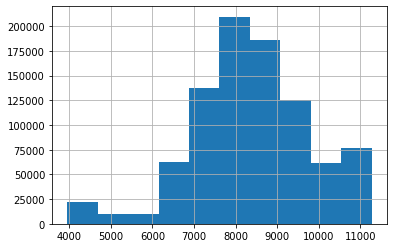

In [3]:
plt.style.use
%matplotlib inline
twii.hist()

In [6]:
# print('==================================')
# print('GroupBy 示範')
s = pd.Series([1, 2, 3, 4, 5, 6])
sumData = s.groupby([0, 1, 0, 1, 0, 1]).sum()
sumData

0     9
1    12
dtype: int64

In [7]:
df = pd.DataFrame({'a': s, 'b': s})
df

,a,b
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6


In [8]:
sumData = df.groupby([1, 2, 1, 2, 1, 2]).first()
sumData

,a,b
1,1,1
2,2,2


### 每月漲跌

In [10]:
start_price = twii.groupby([twii.index.year, twii.index.month]).first()
last_price = twii.groupby([twii.index.year, twii.index.month]).last()
profit = (last_price/start_price)

profit.index.levels[0].name = 'year'
profit.index.levels[1].name = 'month'
profit
profit = profit.reset_index()
profit = profit.pivot("year","month")#['台股指數']
profit
#profit

台股指數                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2006   0.997532  1.004508  1.007977  1.084337  0.954709  0.979182  0.962736   
2007   0.984141  1.026277  0.997779  0.998860  1.034224  1.090640  1.045484   
2008   0.884186  1.118550  1.018999  1.040516  0.966273  0.872894  0.933611   
2009   0.925238  1.072783  1.143443  1.150020  1.149831  0.933490  1.100363   
2010   0.933114  0.973255  1.065083  1.010630  0.921258  0.993950  1.058840   
2011   1.019264  0.940330  1.009727  1.037379  0.997887  0.962593  0.999028   
2012   1.062923  1.080398  0.976797  0.945635  0.973310  0.999285  0.996465   
2013   1.019549  1.006110  1.002612  1.022106  1.019909  0.976669  1.005672   
2014   0.982705  1.020917  1.024272  0.993464  1.032358  1.034945  0.991779   
2015   1.005872  1.027792  0.996294  1.024369  0.987884  0.961030  0.929456   
2016   0.976871  1.032651  1.039670  0.958040  1.018822  1.015346  1.036673   
2017   1.021014  1.032020  1.006261  1.006164  1.017091  1.035291  1.003103   
2018   1.043309  0.974034  1.009618  0.976042  1.020368  0.996501  1.020356   
2019   1.021059  1.046003  1.024244  1.030701  0.957216  1.029078       NaN   

                                                         
month        8         9         10        11        12  
year                                                     
2006   1.024353  1.041030  1.020088  1.077820  1.033828  
2007   0.967150  1.055038  1.024782  0.884159  0.990669  
2008   1.003139  0.811693  0.851621  0.915788  1.029308  
2009   0.964429  1.100092  0.977482  1.032987  1.079911  
2010   0.981400  1.081602  1.005986  1.010304  1.071666  
2011   0.895557  0.933348  1.050144  0.909911  1.024328  
2012   1.017409  1.043004  0.928827  1.057789  1.015742  
2013   0.989387  1.018946  1.033789  0.994884  1.024347  
2014   1.012926  0.950261  1.000874  1.023665  1.013074  
2015   0.943404  1.000773  1.045601  0.972680  1.002097  
2016   1.009399  1.010806  1.013447  0.994681  1.001384  
2017   1.015196  0.980933  1.039471  0.978380  1.007805  
2018   1.000582  0.994794  0.890589  1.008763  0.983756  
2019        NaN       NaN       NaN       NaN       NaN

### 每月漲跌色溫圖

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 21488 missing from c

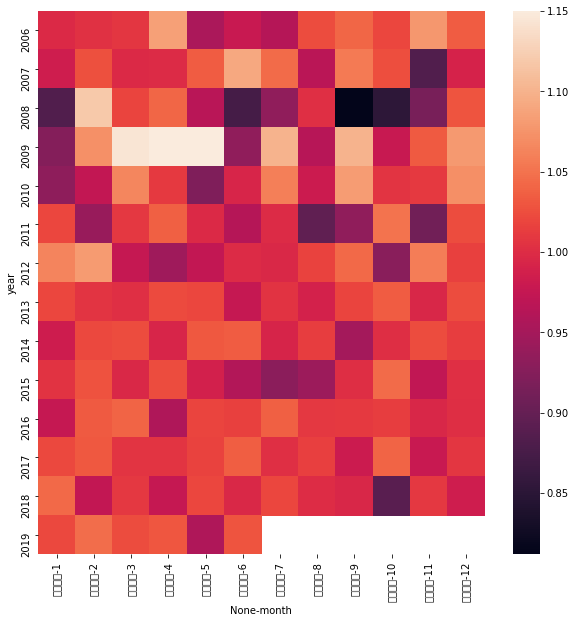

In [11]:
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(profit)

### 均線分析

In [12]:
# 每日開盤價
twii_daily = twii.groupby(twii.index.date).last()
# 將日期變成datetime格式
twii_daily.index = pd.to_datetime(twii_daily.index)
# print(twii_daily)

# # 60日平均 ====> 因為資料是每日資料因此60是每六十日一次
twii_average = twii_daily.rolling(60).mean()
# print(twii_average)

# 乖離率
twii_bias = twii_daily / twii_average
# print(twii_bias)

# 後60日漲跌
# print(twii_daily.shift(-2))
twii_profit = twii_daily.shift(-60) / twii_daily
# print(twii_profit)

# 將資料合併（方便之後做圖）
df = pd.DataFrame({
    'price': twii_daily,
    'sma': twii_average,
    'bias': twii_bias,
    'profit': twii_profit,
    'year': twii_daily.index.year,
})

# 刪除NaN
df = df.dropna(how='any')
df

,price,sma,bias,profit,year
2006-04-04,6665.60,6570.783000,1.014430,1.005822,2006
2006-04-06,6760.82,6575.762333,1.028142,0.993740,2006
2006-04-07,6781.94,6578.931833,1.030857,0.993006,2006
2006-04-10,6780.64,6581.668500,1.030231,0.982202,2006
2006-04-11,6757.17,6582.456833,1.026542,0.985482,2006
2006-04-12,6808.50,6584.351500,1.034043,0.978279,2006
2006-04-13,6855.74,6586.240667,1.040919,0.974725,2006
2006-04-14,6952.54,6590.326333,1.054961,0.954922,2006
2006-04-17,7000.09,6594.729667,1.061467,0.947715,2006
2006-04-18,6989.46,6599.127167,1.059149,0.939643,2006


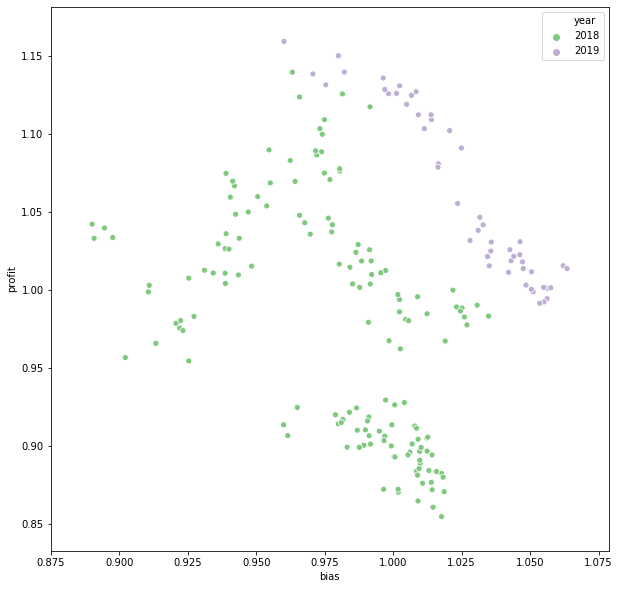

In [13]:
sns.scatterplot(x="bias", y="profit", data=df.tail(200), hue="year", palette="Accent", legend="full")

### 查看當前的乖離率

In [14]:
twii_bias.tail()

2019-06-17    0.986857
2019-06-18    0.990226
2019-06-19    1.009513
2019-06-20    1.010189
2019-06-21    1.011434
Name: 台股指數, dtype: float64